In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import random

from matplotlib.ticker import StrMethodFormatter
from statsmodels.tsa.stattools import adfuller
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.backend import clear_session

from tensorflow.random import set_seed
set_seed(42)

%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
# Check library version 
print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)
print('Seaborn: ', sns.__version__)

Numpy:  1.22.4
Pandas:  1.5.3
Seaborn:  0.11.1


In [4]:
loc = "version1_data\dataset.xlsx"
sheet_name = "electdata"
dataset = pd.read_excel(open(loc, 'rb'), sheet_name=sheet_name, engine = 'openpyxl')
dataset.columns = dataset.columns.astype(str)
dataset = dataset.iloc[:,1:].T

In [5]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
cluster,2,7,4,5,4,6,3,4,4,4,...,1,2,1,1,1,1,1,5,4,1
2022-01-01 00:00:00,717,772,109,593,918,193,856,275,109,107,...,295,1160,557,228,307,13,1100,402,276,742
2022-01-01 01:00:00,926,769,88,441,504,296,718,421,110,98,...,321,1058,538,73,313,0,635,523,5299,655
2022-01-01 02:00:00,431,856,97,353,473,117,603,624,110,83,...,437,242,460,180,423,0,404,336,501,502
2022-01-01 03:00:00,558,741,0,382,480,129,548,738,110,78,...,386,798,451,247,604,0,383,325,414,547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,1772,3025,454,463,2239,641,998,1041,534,1050,...,509,1179,953,675,387,2,1252,765,1719,291
2022-12-31 20:00:00,3443,4364,685,783,1788,1073,1576,901,1661,857,...,559,1603,930,404,3402,0,1120,732,2287,264
2022-12-31 21:00:00,1991,2493,742,1330,1955,889,1315,1008,1939,694,...,765,1334,1027,368,1340,166,1031,1475,1638,170
2022-12-31 22:00:00,2314,3769,582,2024,1692,661,1191,3390,152,774,...,815,1650,978,398,979,383,1266,1030,1168,175


In [6]:
data_cluster = dataset.T.groupby('cluster').mean()
data_cluster = data_cluster.T
data_cluster

cluster,1,2,3,4,5,6,7
2022-01-01 00:00:00,413.692308,716.50,608.333333,311.666667,510.333333,431.750,787.8
2022-01-01 01:00:00,340.923077,925.75,594.444444,627.500000,396.666667,426.625,1355.6
2022-01-01 02:00:00,293.307692,430.75,602.444444,326.555556,257.333333,413.625,1173.2
2022-01-01 03:00:00,305.538462,558.50,529.666667,324.277778,286.000000,432.750,784.8
2022-01-01 04:00:00,466.153846,435.50,474.111111,302.388889,322.333333,373.125,712.0
...,...,...,...,...,...,...,...
2022-12-31 19:00:00,536.153846,1185.25,1311.000000,1450.611111,663.666667,633.750,2868.4
2022-12-31 20:00:00,904.769231,1590.00,1725.444444,1467.388889,721.333333,826.375,4456.8
2022-12-31 21:00:00,620.153846,1332.25,2558.000000,1490.722222,1123.666667,676.000,2550.2
2022-12-31 22:00:00,690.230769,1652.50,1056.444444,1357.333333,1318.000000,543.500,3571.8


In [7]:
data_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 2022-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       8760 non-null   float64
 1   2       8760 non-null   float64
 2   3       8760 non-null   float64
 3   4       8760 non-null   float64
 4   5       8760 non-null   float64
 5   6       8760 non-null   float64
 6   7       8760 non-null   float64
dtypes: float64(7)
memory usage: 547.5+ KB


In [8]:
data_cluster.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
1,8760.0,814.236310,340.463401,202.230769,554.134615,758.192308,1017.423077,2586.461538
2,8760.0,1020.317951,516.148495,118.250000,697.500000,890.625000,1196.875000,5181.750000
3,8760.0,1107.852156,488.998152,31.666667,751.638889,1009.333333,1359.555556,4694.222222
4,8760.0,1288.556697,568.276951,238.500000,876.166667,1203.722222,1595.402778,4457.222222
5,8760.0,1331.704985,869.762871,123.000000,693.666667,1075.666667,1715.416667,7248.666667
6,8760.0,1085.838499,619.565307,144.625000,634.250000,941.375000,1372.875000,5305.250000
7,8760.0,1988.571393,1151.751135,148.200000,1146.300000,1685.400000,2503.400000,8736.000000


In [9]:
data_cluster.index =pd.to_datetime(data_cluster.index)
data_cluster.index

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2022-12-31 14:00:00', '2022-12-31 15:00:00',
               '2022-12-31 16:00:00', '2022-12-31 17:00:00',
               '2022-12-31 18:00:00', '2022-12-31 19:00:00',
               '2022-12-31 20:00:00', '2022-12-31 21:00:00',
               '2022-12-31 22:00:00', '2022-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq=None)

In [10]:
# Dataset timeframe
print('Dataset start', data_cluster.index.min())
print('Dataset end', data_cluster.index.max())
print('Dataset spans', data_cluster.index.max() - data_cluster.index.min())

Dataset start 2022-01-01 00:00:00
Dataset end 2022-12-31 23:00:00
Dataset spans 364 days 23:00:00


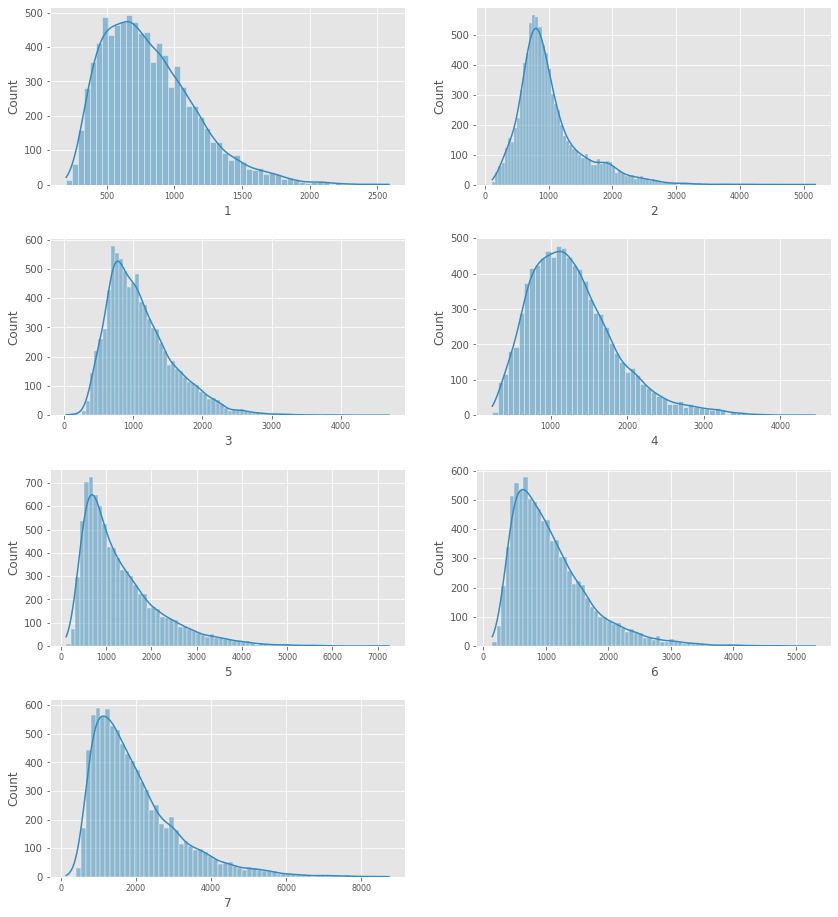

In [11]:
## Histograms: Plotting feature distributions

# Features to plot
columns = data_cluster.columns

# Creating subplot axes
fig, axes = plt.subplots(4, 2, figsize=(14,16), sharey=False)
axes[3,1].set_axis_off()

# Iterating through axes and columns
for col, ax in zip(columns, axes.flatten()):
    sns.histplot(x=col, kde=True, data=data_cluster, ax=ax)
    ax.tick_params(axis='x', labelsize=8)
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    plt.subplots_adjust(hspace=0.3);

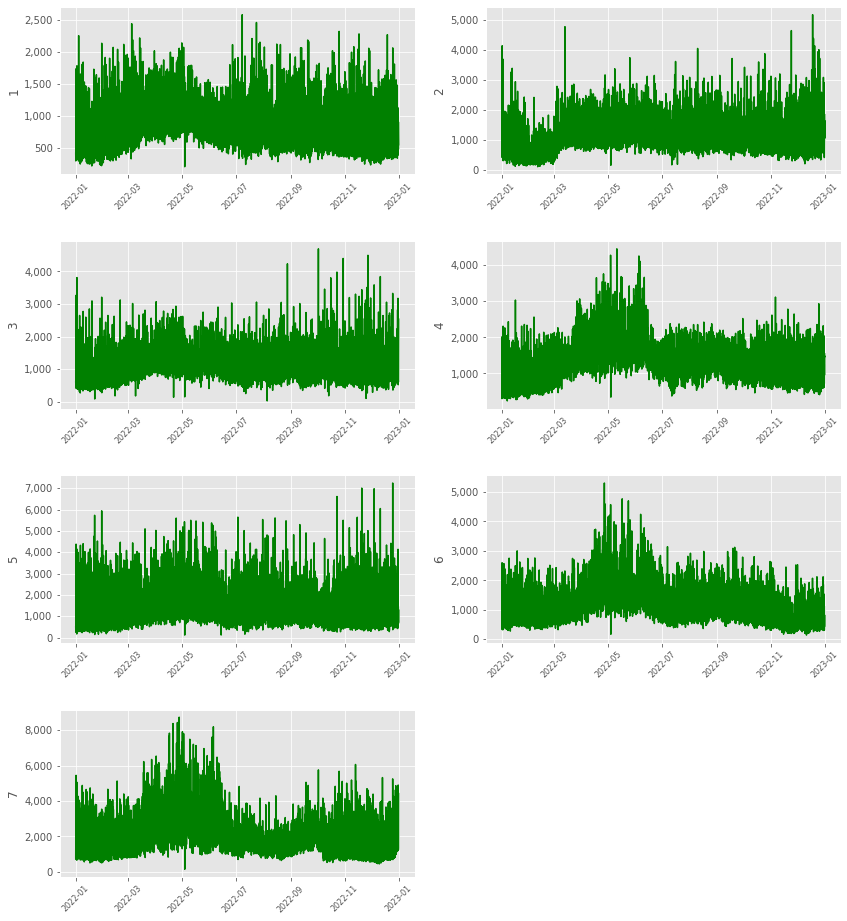

In [12]:
## Plotting features over time

# Features to plot
columns = data_cluster.columns

# Creating subplot axes
fig, axes = plt.subplots(4, 2, figsize=(14,16), sharey=False)
axes[3,1].set_axis_off()

# Iterating through axes and columns
for col, ax in zip(columns, axes.flatten()):
    sns.lineplot(data=data_cluster, x=data_cluster.index, y=col, ax=ax, color='green')
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    plt.subplots_adjust(hspace=0.4);

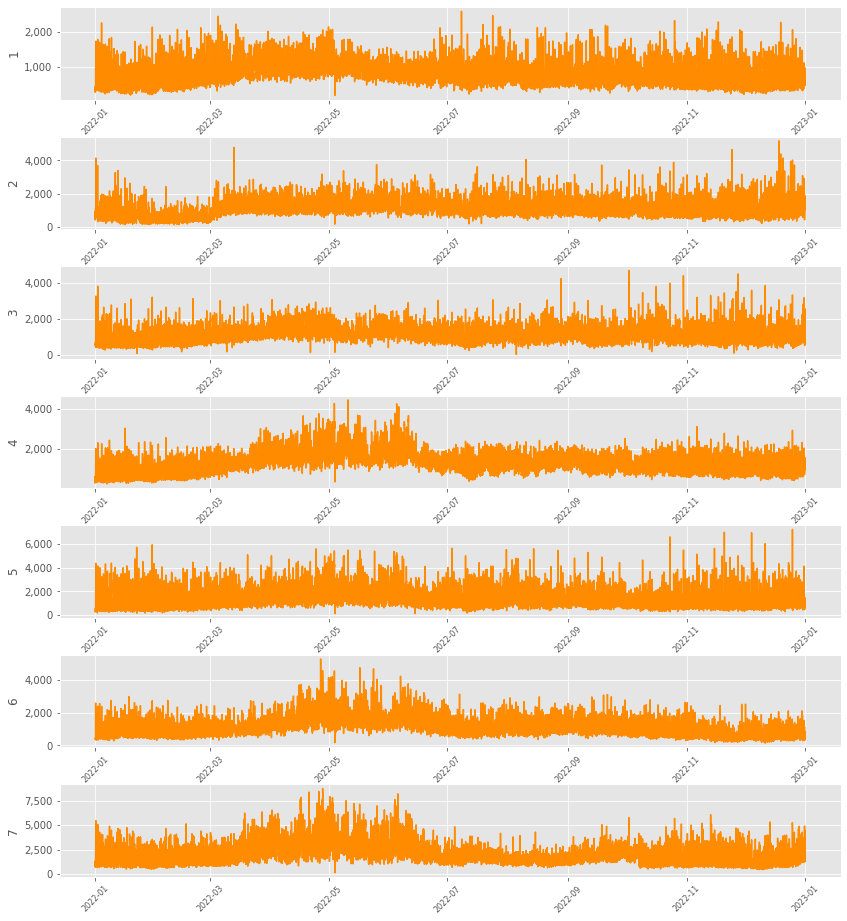

In [13]:
## Plotting features over time (with a different aspect ratio)

# Features to plot
columns = data_cluster.columns

# Creating subplot axes
fig, axes = plt.subplots(7, 1, figsize=(14,16), sharey=False)

# Iterating through axes and columns
for col, ax in zip(columns, axes.flatten()):
    sns.lineplot(data=data_cluster, x=data_cluster.index, y=col, ax=ax, color='darkorange')
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    plt.subplots_adjust(hspace=0.4);

In [14]:
for i in range(1,len(data_cluster.columns)+1):
    print(f'\033[1m Cluster {i} \033[0m')
    results = adfuller(data_cluster.iloc[i]) #results object is a tuple

    # Print Dicky-Fuller test results
    print(f'Dicky-Fuller test results:{results}\n') #0th element: test statistic, 1st element: pval

    # Print test statistic
    print(f'test statistic:{results[0]}\n')

    # Print p-value
    print(f'p-value:{np.round(results[1], 3)}\n')

    # Print critical values
    print(f'critical values:{results[4]}\n') 

    # Significance statement
    alpha = 0.05

    if results[1] < alpha:
        print(f'\033[1mp-value < {alpha}: We reject the null hypothesis\nConclusion: Time series is stationary\033[0m')
    else:
        print(f'\033[1mp-value > {alpha}: We accept the null hypothesis\nConclusion: Time series is not stationary due to trend\033[0m')

 Cluster 1 
Dicky-Fuller test results:(-2.1340189752820224, 0.23105718323109153, 0, 6, {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}, 76.26452040451024)

test statistic:-2.1340189752820224

p-value:0.231

critical values:{'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}

p-value > 0.05: We accept the null hypothesis
Conclusion: Time series is not stationary due to trend
 Cluster 2 
Dicky-Fuller test results:(-1.5351639184397379, 0.5160501268845021, 1, 5, {'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681}, 74.36676748055848)

test statistic:-1.5351639184397379

p-value:0.516

critical values:{'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681}

p-value > 0.05: We accept the null hypothesis
Conclusion: Time series is not stationary due to trend
 Cluster 3 
Dicky-Fuller test results:(-2.2125621431892246, 0.20171775687704846, 1, 5, {'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681}, 65.94432659

In [15]:
def split_data(data, test_size=0.2, analysis='univariate'):
    """
    Function to split time series data into train and test set
    Parameters:
        test_size: float, default=0.2
        analysis: {'univariate', 'univariate'}, default='univariate'
    """
    if analysis == 'univariate':
        position = int(round(len(data) * (1-test_size)))
        train = np.array(data[:position]).reshape(-1,1)
        test = np.array(data[position:]).reshape(-1,1)
    
    elif analysis == 'multivariate':
        position = int(round(len(data) * (1-test_size)))
        train = data[:position]
        test = data[position:]
        
    else:
        print("Please specify if analysis is univariate or multivariate")
        
    return train, test

In [16]:
def scale(data, train_split):
    """
    Function to scale the entire dataset using the mean and standard deviation of the training data only
    """
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    
    return (data - data_mean) / data_std

In [17]:
def inv_scale(data, scaled_data, train_split):
    """
    Function to inverse scaling of data by using the mean and standard deviation of the training data only
    """
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
       
    return scaled_data * data_std + data_mean

In [18]:
def create_samples_univar(data, n_input, n_output):
    """
    Function to convert time series observations
    into input X and output y 
    """
    X, y = [], []
    
    for i in range(n_input, len(data)): #start, stop
        if i+n_output > len(data):
            break
        X.append(data[i-n_input : i])
        y.append(data[i : i+n_output]) 
        
    return np.array(X), np.array(y)

In [19]:
def create_samples_multivar(data, n_input, n_output, target_index=0):
    """
    Function to convert time series observations
    into input X and output y 
    """
    X, y = [], []
    
    # Move column defined by target_index to first position
    a=[]
    a = data[:, target_index].reshape(-1,1)
    b = np.delete(data, target_index, axis=1)
    data = np.concatenate((a, b), axis=1)
            
    for i in range(n_input, len(data)): #start, stop
        if i+n_output > len(data):
            break
        X.append(data[i-n_input : i, :])
        y.append(data[i : i+n_output, 0]) 
        
    return np.array(X), np.array(y)

In [20]:
def summarize_scores(name, score, scores):
    """
    Function to summarize scores
    """
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s' % (name, score, s_scores))

In [21]:
def plot_model(history):
    """
    Function to plot training and validation loss
    """
    plt.figure(figsize=(10,5))
    plt.plot(history.history["loss"], color="r", label="Training Loss")
    plt.plot(history.history["val_loss"], color="b", label="Validation Loss")
    plt.legend(loc="upper right")
    plt.xlabel("Epoch", fontsize=16)
    plt.ylabel("Loss", fontsize=16)
    plt.ylim([0, max(plt.ylim())])
    plt.title("Training and Validation Loss", fontsize=16);

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 24, 1)]              0         []                            
                                                                                                  
 multi_head_attention (Mult  (None, 24, 1)                57        ['input_1[0][0]',             
 iHeadAttention)                                                     'input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 24, 1)                0         ['multi_head_attention[0][0]']
                                                                                                  
 add (Add)                   (None, 24, 1)                0         ['input_1[0][0]',         

Epoch 35/50
816/816 [==============================] - 3s 3ms/step - loss: 0.0199 - mae: 0.1116 - val_loss: 0.0222 - val_mae: 0.1262
Epoch 36/50
816/816 [==============================] - 3s 3ms/step - loss: 0.0199 - mae: 0.1116 - val_loss: 0.0233 - val_mae: 0.1305
Epoch 37/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0199 - mae: 0.1116 - val_loss: 0.0234 - val_mae: 0.1309
Epoch 38/50
816/816 [==============================] - 3s 3ms/step - loss: 0.0199 - mae: 0.1116 - val_loss: 0.0237 - val_mae: 0.1320
Epoch 39/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0199 - mae: 0.1116 - val_loss: 0.0235 - val_mae: 0.1311
Epoch 40/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0199 - mae: 0.1116 - val_loss: 0.0230 - val_mae: 0.1292
Epoch 41/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0199 - mae: 0.1116 - val_loss: 0.0228 - val_mae: 0.1286
Epoch 42/50
816/816 [==============================] - 2s 3ms/step - 

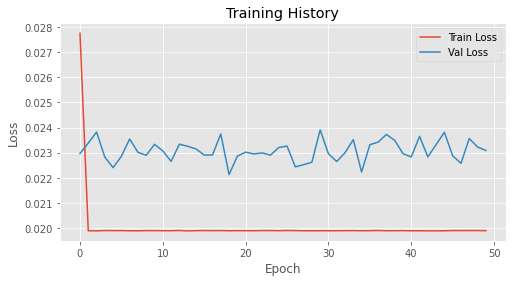

67/67 [==============================] - 0s 2ms/step

Overall Metrics:
RMSE: 362.261
MAE: 309.101
R-Squared: -0.206


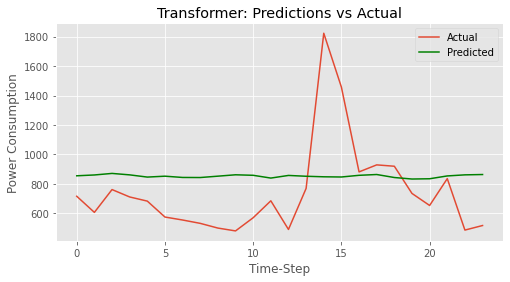

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 24, 1)]              0         []                            
                                                                                                  
 multi_head_attention (Mult  (None, 24, 1)                57        ['input_1[0][0]',             
 iHeadAttention)                                                     'input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 24, 1)                0         ['multi_head_attention[0][0]']
                                                                                                  
 add (Add)                   (None, 24, 1)                0         ['input_1[0][0]',         

Epoch 35/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0101 - mae: 0.0749 - val_loss: 0.0113 - val_mae: 0.0778
Epoch 36/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0101 - mae: 0.0749 - val_loss: 0.0112 - val_mae: 0.0765
Epoch 37/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0101 - mae: 0.0748 - val_loss: 0.0113 - val_mae: 0.0791
Epoch 38/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0100 - mae: 0.0748 - val_loss: 0.0114 - val_mae: 0.0797
Epoch 39/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0101 - mae: 0.0749 - val_loss: 0.0114 - val_mae: 0.0795
Epoch 40/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0101 - mae: 0.0748 - val_loss: 0.0112 - val_mae: 0.0776
Epoch 41/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0101 - mae: 0.0748 - val_loss: 0.0113 - val_mae: 0.0787
Epoch 42/50
816/816 [==============================] - 3s 4ms/step - 

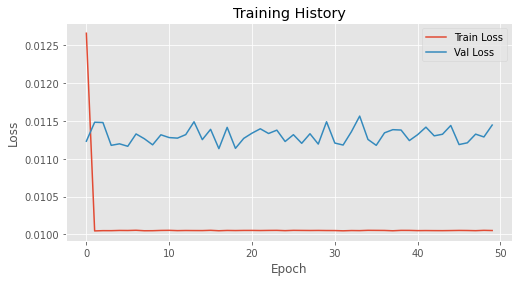

67/67 [==============================] - 0s 2ms/step

Overall Metrics:
RMSE: 541.666
MAE: 407.326
R-Squared: -0.040


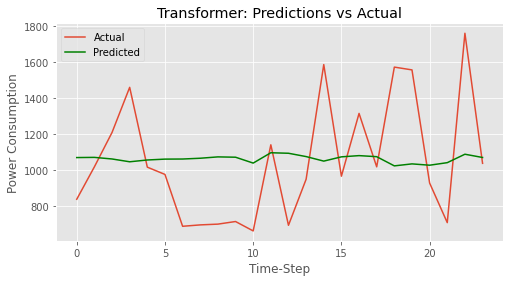

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 24, 1)]              0         []                            
                                                                                                  
 multi_head_attention (Mult  (None, 24, 1)                57        ['input_1[0][0]',             
 iHeadAttention)                                                     'input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 24, 1)                0         ['multi_head_attention[0][0]']
                                                                                                  
 add (Add)                   (None, 24, 1)                0         ['input_1[0][0]',         

Epoch 35/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0102 - mae: 0.0793 - val_loss: 0.0129 - val_mae: 0.0853
Epoch 36/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0102 - mae: 0.0792 - val_loss: 0.0129 - val_mae: 0.0873
Epoch 37/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0102 - mae: 0.0793 - val_loss: 0.0130 - val_mae: 0.0882
Epoch 38/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0102 - mae: 0.0792 - val_loss: 0.0130 - val_mae: 0.0880
Epoch 39/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0102 - mae: 0.0792 - val_loss: 0.0130 - val_mae: 0.0882
Epoch 40/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0102 - mae: 0.0793 - val_loss: 0.0129 - val_mae: 0.0868
Epoch 41/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0102 - mae: 0.0793 - val_loss: 0.0130 - val_mae: 0.0878
Epoch 42/50
816/816 [==============================] - 2s 3ms/step - 

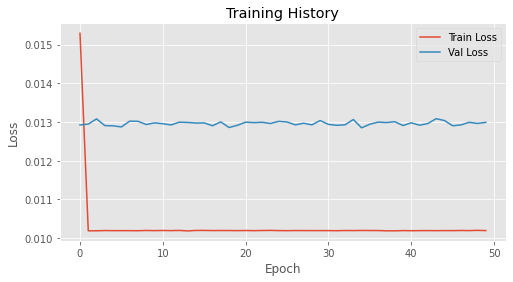

67/67 [==============================] - 0s 2ms/step

Overall Metrics:
RMSE: 531.428
MAE: 410.817
R-Squared: -0.013


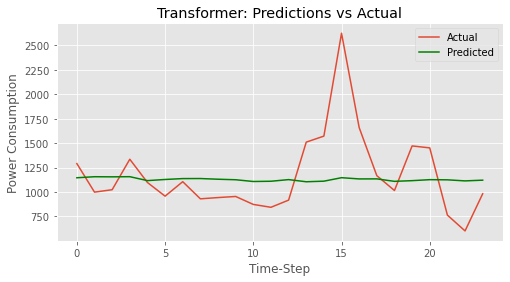

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 24, 1)]              0         []                            
                                                                                                  
 multi_head_attention (Mult  (None, 24, 1)                57        ['input_1[0][0]',             
 iHeadAttention)                                                     'input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 24, 1)                0         ['multi_head_attention[0][0]']
                                                                                                  
 add (Add)                   (None, 24, 1)                0         ['input_1[0][0]',         

Epoch 35/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0199 - mae: 0.1089 - val_loss: 0.0131 - val_mae: 0.0990
Epoch 36/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0200 - mae: 0.1089 - val_loss: 0.0138 - val_mae: 0.1018
Epoch 37/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0199 - mae: 0.1089 - val_loss: 0.0142 - val_mae: 0.1034
Epoch 38/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0199 - mae: 0.1089 - val_loss: 0.0145 - val_mae: 0.1046
Epoch 39/50
816/816 [==============================] - 4s 4ms/step - loss: 0.0199 - mae: 0.1089 - val_loss: 0.0147 - val_mae: 0.1055
Epoch 40/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0200 - mae: 0.1089 - val_loss: 0.0135 - val_mae: 0.1004
Epoch 41/50
816/816 [==============================] - 3s 4ms/step - loss: 0.0199 - mae: 0.1089 - val_loss: 0.0137 - val_mae: 0.1016
Epoch 42/50
816/816 [==============================] - 4s 5ms/step - 

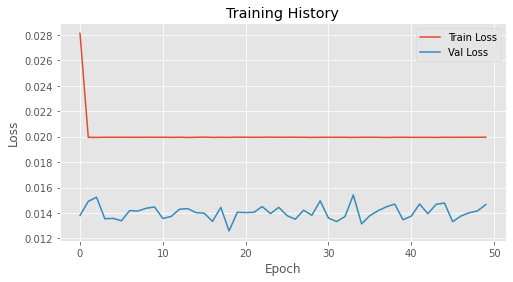

67/67 [==============================] - 0s 2ms/step

Overall Metrics:
RMSE: 510.757
MAE: 444.413
R-Squared: -0.557


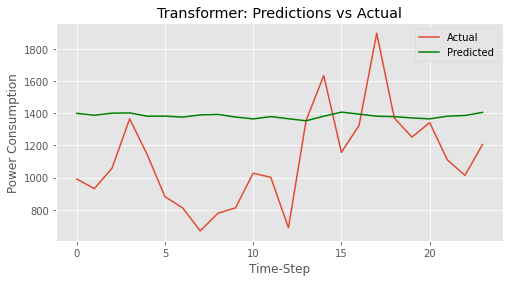

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 24, 1)]              0         []                            
                                                                                                  
 multi_head_attention (Mult  (None, 24, 1)                57        ['input_1[0][0]',             
 iHeadAttention)                                                     'input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 24, 1)                0         ['multi_head_attention[0][0]']
                                                                                                  
 add (Add)                   (None, 24, 1)                0         ['input_1[0][0]',         

Epoch 35/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0152 - mae: 0.0952 - val_loss: 0.0143 - val_mae: 0.0968
Epoch 36/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0152 - mae: 0.0952 - val_loss: 0.0147 - val_mae: 0.0996
Epoch 37/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0152 - mae: 0.0952 - val_loss: 0.0147 - val_mae: 0.0994
Epoch 38/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0152 - mae: 0.0952 - val_loss: 0.0152 - val_mae: 0.1024
Epoch 39/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0152 - mae: 0.0953 - val_loss: 0.0148 - val_mae: 0.0996
Epoch 40/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0152 - mae: 0.0952 - val_loss: 0.0144 - val_mae: 0.0979
Epoch 41/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0152 - mae: 0.0952 - val_loss: 0.0145 - val_mae: 0.0980
Epoch 42/50
816/816 [==============================] - 2s 3ms/step - 

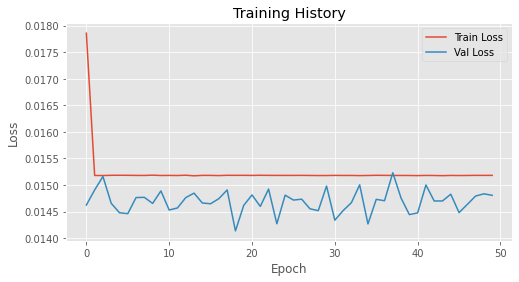

67/67 [==============================] - 0s 2ms/step

Overall Metrics:
RMSE: 867.066
MAE: 712.611
R-Squared: -0.180


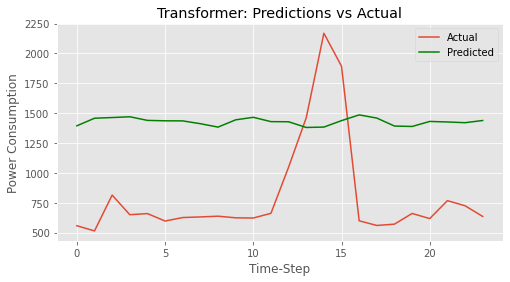

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 24, 1)]              0         []                            
                                                                                                  
 multi_head_attention (Mult  (None, 24, 1)                57        ['input_1[0][0]',             
 iHeadAttention)                                                     'input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 24, 1)                0         ['multi_head_attention[0][0]']
                                                                                                  
 add (Add)                   (None, 24, 1)                0         ['input_1[0][0]',         

Epoch 35/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0149 - mae: 0.0925 - val_loss: 0.0148 - val_mae: 0.1117
Epoch 36/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0149 - mae: 0.0924 - val_loss: 0.0153 - val_mae: 0.1135
Epoch 37/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0149 - mae: 0.0924 - val_loss: 0.0161 - val_mae: 0.1167
Epoch 38/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0149 - mae: 0.0924 - val_loss: 0.0163 - val_mae: 0.1174
Epoch 39/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0149 - mae: 0.0925 - val_loss: 0.0164 - val_mae: 0.1176
Epoch 40/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0149 - mae: 0.0925 - val_loss: 0.0149 - val_mae: 0.1120
Epoch 41/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0149 - mae: 0.0924 - val_loss: 0.0155 - val_mae: 0.1144
Epoch 42/50
816/816 [==============================] - 2s 3ms/step - 

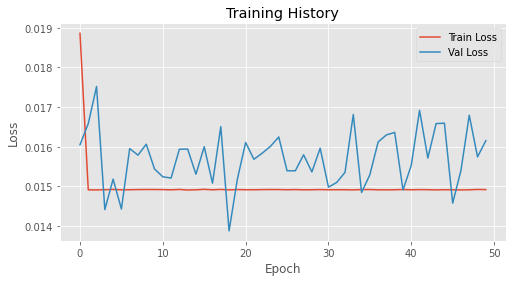

67/67 [==============================] - 0s 2ms/step

Overall Metrics:
RMSE: 655.884
MAE: 603.170
R-Squared: -1.754


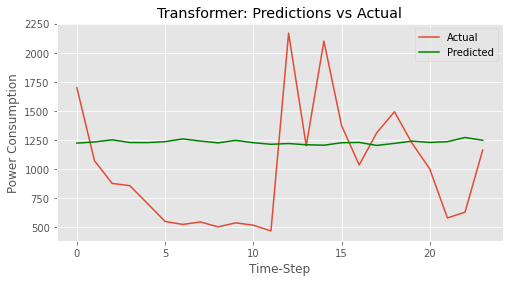

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 24, 1)]              0         []                            
                                                                                                  
 multi_head_attention (Mult  (None, 24, 1)                57        ['input_1[0][0]',             
 iHeadAttention)                                                     'input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 24, 1)                0         ['multi_head_attention[0][0]']
                                                                                                  
 add (Add)                   (None, 24, 1)                0         ['input_1[0][0]',         

Epoch 35/50
816/816 [==============================] - 3s 4ms/step - loss: 0.0194 - mae: 0.1062 - val_loss: 0.0148 - val_mae: 0.1065
Epoch 36/50
816/816 [==============================] - 3s 3ms/step - loss: 0.0194 - mae: 0.1061 - val_loss: 0.0150 - val_mae: 0.1075
Epoch 37/50
816/816 [==============================] - 3s 3ms/step - loss: 0.0194 - mae: 0.1061 - val_loss: 0.0154 - val_mae: 0.1091
Epoch 38/50
816/816 [==============================] - 3s 3ms/step - loss: 0.0194 - mae: 0.1061 - val_loss: 0.0157 - val_mae: 0.1103
Epoch 39/50
816/816 [==============================] - 3s 3ms/step - loss: 0.0194 - mae: 0.1062 - val_loss: 0.0158 - val_mae: 0.1109
Epoch 40/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0194 - mae: 0.1062 - val_loss: 0.0153 - val_mae: 0.1087
Epoch 41/50
816/816 [==============================] - 2s 3ms/step - loss: 0.0194 - mae: 0.1062 - val_loss: 0.0147 - val_mae: 0.1060
Epoch 42/50
816/816 [==============================] - 3s 3ms/step - 

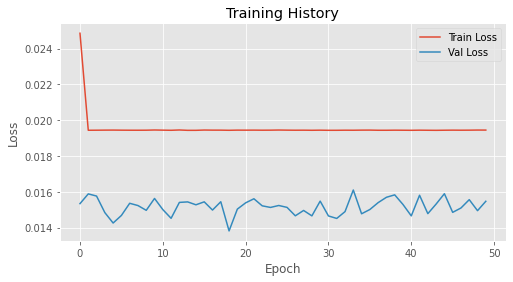

67/67 [==============================] - 0s 2ms/step

Overall Metrics:
RMSE: 1068.198
MAE: 939.860
R-Squared: -0.495


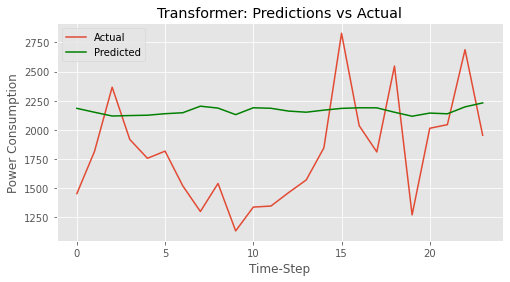

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.layers import (
    Input,
    Dense,
    Dropout,
    LayerNormalization,
    MultiHeadAttention,
    GlobalAveragePooling1D,
    Add,
    TimeDistributed,
)
from keras.optimizers import Adam
from keras.backend import clear_session


# Function to create sequences for the transformer model
def create_samples_univar(data, n_input=24, n_output=24):
    X, y = [], []
    for i in range(len(data) - n_input - n_output):
        X.append(data[i : i + n_input])
        y.append(data[i + n_input : i + n_input + n_output])
    return np.array(X), np.array(y)


# Function to build the Transformer model
def build_transformer(n_input, n_features, n_heads=8, ff_dim=256, dropout_rate=0.1):
    inputs = Input(shape=(n_input, n_features))

    # Multi-Head Attention
    attention = MultiHeadAttention(num_heads=n_heads, key_dim=n_features)(inputs, inputs)
    attention = Dropout(dropout_rate)(attention)
    attention = Add()([inputs, attention])
    attention = LayerNormalization()(attention)

    # Feedforward Network
    feedforward = Dense(ff_dim, activation='relu')(attention)
    feedforward = Dropout(dropout_rate)(feedforward)
    feedforward = Dense(n_features)(feedforward)
    outputs = Add()([attention, feedforward])
    outputs = LayerNormalization()(outputs)

    # Output Layer
    outputs = GlobalAveragePooling1D()(outputs)
    outputs = Dense(n_output)(outputs)

    # Create Model
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model


# Data scaling and splitting functions remain the same...

for i in range(1, len(data_cluster.columns) + 1):
    feature = data_cluster.T.iloc[i - 1]

    # Scaling and splitting the data
    test_size = 0.25
    TRAIN_SPLIT = int(round(len(feature) * (1 - test_size)))
    scaler = MinMaxScaler()
    feature_scaled = scaler.fit_transform(feature.values.reshape(-1, 1))
    train, test = feature_scaled[:TRAIN_SPLIT], feature_scaled[TRAIN_SPLIT:]

    # Create samples for the transformer
    n_input = 24  # Past 24 hours
    n_output = 24  # Predict 24 hours
    X_train, y_train = create_samples_univar(train, n_input=n_input, n_output=n_output)
    X_test, y_test = create_samples_univar(test, n_input=n_input, n_output=n_output)

    # Reshape target variable for training
    y_train = y_train.reshape(y_train.shape[0], n_output)
    y_test = y_test.reshape(y_test.shape[0], n_output)

    # Clear session
    clear_session()

    # Build and compile the Transformer model
    model = build_transformer(n_input, n_features=1)
    print(model.summary())

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=50,
        batch_size=8,
        verbose=1
    )

    # Plot training history
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.legend()
    plt.title('Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

    # Evaluate the model
    yhat = model.predict(X_test)
    yhat_inv = scaler.inverse_transform(yhat.reshape(-1, 1)).flatten()
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

    # Metrics
    rmse_total = mean_squared_error(y_test_inv, yhat_inv, squared=False)
    mae_total = mean_absolute_error(y_test_inv, yhat_inv)
    r2_total = r2_score(y_test_inv, yhat_inv)

    print("\nOverall Metrics:")
    print(f"RMSE: {rmse_total:.3f}")
    print(f"MAE: {mae_total:.3f}")
    print(f"R-Squared: {r2_total:.3f}")

    # Plot Predictions vs Actual
    plt.figure(figsize=(8, 4))
    plt.plot(y_test_inv[:24], label='Actual')
    plt.plot(yhat_inv[:24], label='Predicted', color='green')
    plt.xlabel('Time-Step')
    plt.ylabel('Power Consumption')
    plt.title('Transformer: Predictions vs Actual')
    plt.legend()
    plt.show()

# Input data: clusters (total daily consumption)
for i in range(1,len(data_cluster.columns)+1):
    print(f'\033[1m Cluster {i} \033[0m')
    feature = data_cluster.T.iloc[0]
    print(feature.head())
    # Define train/test split
    test_size = 0.25
    TRAIN_SPLIT = int(round(len(data_cluster) * (1-test_size)))
    print(TRAIN_SPLIT)
    # Get data values
    univar_data = feature.values
    print(univar_data)
    # Scale data (using training data)
    univar_data_scaled = scale(univar_data, TRAIN_SPLIT)
    print(univar_data_scaled.shape, univar_data_scaled)
    # Split data into train and test
    train, test = split_data(data=univar_data_scaled, test_size=test_size, analysis='univariate')

    # Print shape and first 5 values for train set
    print("Shape train:", train.shape, "\nShape test:", test.shape, '\n')
    print(train[:5])
    # Visualize train/test split
    plt.figure(figsize=(12,4))
    plt.plot(data_cluster.iloc[:len(train), 0])
    plt.plot(data_cluster.iloc[len(train):, 0])
    plt.xlabel('datetime')
    plt.ylabel("electricity_consumption")
    plt.tick_params(axis='x', labelrotation=45, labelsize=8)
    plt.legend(['train','test']);
    
    # Create samples for train and test set
    n_input = 24    
    n_output = 24

    X_train, y_train = create_samples_univar(train, n_input=n_input, n_output=n_output)
    X_test, y_test = create_samples_univar(test, n_input=n_input, n_output=n_output)

    # Print shape and first 3 values for train set
    print("Shape X_train y_train:", X_train.shape, y_train.shape,
          "\nShape X_test y_test:", X_test.shape, y_test.shape, '\n')
    for i in range(2):
        print(X_train[i], y_train[i])
    #print(train[-5:], test[-5:])
    #print(X_train[-1], y_train[-1])
    #print(X_test[-1], y_test[-1])
    #print(X_train[0], y_train[0])
    #print(X_test[0], y_test[0])
    # Create model
    clear_session()

    n_features = X_train.shape[2]
    n_input = X_train.shape[1]
    n_output = y_train.shape[1]

    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_input, n_features)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_output))
    model.compile(optimizer='adam', loss='mse', metrics='mae') # mae: mean absolute error

    print(model.summary())
    #print(%%time)

    # Fit model
    epochs = 10
    verbose = 0
    batch_size = 16 #default 32

    history = model.fit(X_train, y_train, epochs=epochs, verbose=verbose, batch_size=batch_size, validation_data=(X_test, y_test))
    plot_model(history)
    
    # Loss and mae value for the model in test mode
    score = model.evaluate(X_test, y_test, verbose = 0)
    print(f'Test loss: {score[0]:.4f}') 
    print(f'Test mae: {score[1]:.4f}')
    
    # List all data in history
    print(history.history.keys())
    print("loss=",history.history["loss"][:5])
    print("mae",history.history["mae"][:5])
    
    # Reshape data for prediction into [1, n_input, 1]
    x_input = X_test[0].reshape((1, len(X_test[0]), 1))
    print(x_input.shape)
    
        # Make prediction
    yhat = model.predict(x_input, verbose=0)

    print(yhat.shape)
    print(yhat)
    
    # Inverse scaling of prediction
    yhat_inv = inv_scale(univar_data, yhat, TRAIN_SPLIT)
    print(yhat_inv.shape)
    print(yhat_inv)
    
    # Inverse scaling of X_test, y_test
    X_test_inv = inv_scale(univar_data, X_test, TRAIN_SPLIT)
    y_test_inv = inv_scale(univar_data, y_test, TRAIN_SPLIT)

    print(X_test_inv.shape, y_test_inv.shape)
    
        # Plot prediction
    plt.figure(figsize=(6,3.5))

    past_seq = range(-len(X_test[0])+1, 1)
    future_seq = np.arange(1, len(y_test[0])+1)

    plt.plot(past_seq, X_test_inv[0], color='blue', marker='.', label='History')
    plt.plot(future_seq, y_test_inv[0], marker='x', label='True Future')
    plt.plot(future_seq, yhat_inv.reshape(-1,1), color='green', marker='o', label='Model Prediction')

    plt.xlabel('Time-Step')
    plt.ylabel('Daily Power Consumption (kW)')
    plt.xticks(range(-n_input,n_output,2))
    plt.title('Univariate Stacked LSTM model: Multi-step prediction')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10);
       
    ## Now randomly select 3 more samples from the test set, perform model prediction and plot results 

    for i in random.sample(range(len(X_test)), 3):
        print(f"Randomly selected sample: {i}")

        # Reshape data for prediction into [1, n_input, 1]
        x_input = X_test[i].reshape((1, len(X_test[i]), 1))

        # Make prediction
        pred = model.predict(x_input, verbose=0)

        # Inverse scaling of prediction
        pred_inv = inv_scale(univar_data, pred, TRAIN_SPLIT)

        # Plot prediction
        plt.figure(figsize=(6,3.5))

        past_seq = range(-len(X_test[0])+1, 1)
        future_seq = np.arange(1, len(y_test[0])+1)

        plt.plot(past_seq, X_test_inv[i], color='blue', marker='.', label='History')
        plt.plot(future_seq, y_test_inv[i], marker='x', label='True Future')
        plt.plot(future_seq, pred_inv.reshape(-1,1), color='green', marker='o', label='Model Prediction')

        plt.xlabel('Time-Step')
        plt.ylabel('Daily Power Consumption (kW)')
        plt.xticks(range(-n_input,n_output,2))
        plt.title('Univariate Stacked LSTM model: Multi-step prediction')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10);
        
            # Actual values
    actual = y_test_inv[0]

    # Predicted values
    predicted = yhat_inv.reshape(-1,1)
    print(actual.shape, predicted.shape)
    print("actual=",actual)
    print("predicted=",predicted)
    
        # Calculate RMSE score for each day
    rmse_hour = []

    for i in range(actual.shape[0]):
        # calculate rmse
        rmse = mean_squared_error(actual[i], predicted[i], squared=False)
        rmse_hour.append(rmse)

    print(rmse_hour)
    
    # Store RMSE scores of each day in df
    df_rmse = pd.DataFrame(rmse_hour, columns=['Univariate Stacked LSTM'])

    # Plot RMSE score for each day
    future_seq = np.arange(1, len(y_test[0])+1)

    plt.figure(figsize=(6,3.5))
    plt.plot(future_seq, rmse_hour, marker='o', color='darkred')
    plt.xlabel('Time-Step')
    plt.ylabel('RMSE (kW)')
    plt.title('Univariate Stacked LSTM model: RMSE per hour forecast');

    # Calculate overall RMSE score (for the respective forecast period)
    rmse_total = mean_squared_error(actual, predicted, squared=False)
    rmse_total

    # Store overall RMSE score in dict
    performance_rmse = {}
    performance_rmse['Univariate Stacked LSTM'] = rmse_total

    # Summarize scores
    summarize_scores('RMSE scores for Univariate Stacked LSTM [total] per day', rmse_total, rmse_hour)


 Part 2: Multivariate LSTM Models (multi-step prediction)

 LSTM Model With Multivariate Input and Vector Outpu

Stacked LSTM

. Encoder-Decoder Model

In [59]:
# Create model
clear_session()

n_features = X_train.shape[2]
n_input = X_train.shape[1]
n_output = y_train.shape[1]

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(RepeatVector(n_output))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(50, activation='relu')))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse', metrics='mae')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 repeat_vector (RepeatVecto  (None, 24, 100)           0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 24, 100)           80400     
                                                                 
 time_distributed (TimeDist  (None, 24, 50)            5050      
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 24, 1)             51        
 stributed)                                                      
                                                        

In [ ]:
%%time

# Fit model
epochs = 50
verbose = 0
batch_size = 16 #default 32

history = model.fit(X_train, y_train, epochs=epochs, verbose=verbose,
                    batch_size=batch_size, validation_data=(X_test, y_test))

In [ ]:
plot_model(history)

In [ ]:
# Loss and mae value for the model in test mode
score = model.evaluate(X_test, y_test, verbose = 0)
print(f'Test loss: {score[0]:.4f}') 
print(f'Test mae: {score[1]:.4f}')

In [ ]:
# List all data in history
print(history.history.keys())

In [ ]:
history.history["loss"][:5]

In [ ]:
history.history["mae"][:5]

In [ ]:
# Reshape data for prediction into [1, n_input, n_features]
x_input = X_test[0].reshape((1, len(X_test[0]), n_features))
x_input.shape

In [ ]:
# Make prediction
yhat = model.predict(x_input, verbose=0)

print(yhat.shape)
yhat

In [ ]:
# Inverse scaling of prediction
yhat_inv = inv_scale(multivar_data[:,0], yhat, TRAIN_SPLIT) 
print(yhat_inv.shape)
yhat_inv

In [ ]:
# Convert (or resample) time series minutes data (here into total per day data)
ddf = data_cluster.resample('D').sum()

# Summarize resampled df
print(ddf.shape)
ddf.head(3)

In [ ]:
## Histograms: Plotting feature distributions

# Features to plot
columns = ddf.columns

# Creating subplot axes
fig, axes = plt.subplots(4, 2, figsize=(14,16), sharey=False)
axes[3,1].set_axis_off()

# Iterating through axes and columns
for col, ax in zip(columns, axes.flatten()):
    sns.histplot(x=col, kde=True, data=ddf, ax=ax)
    ax.tick_params(axis='x', labelsize=8)
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    plt.subplots_adjust(hspace=0.3);

In [ ]:
## Plotting features over time

# Features to plot
columns = ddf.columns

# Creating subplot axes
fig, axes = plt.subplots(4, 2, figsize=(14,16), sharey=False)
axes[3,1].set_axis_off()

# Iterating through axes and columns
for col, ax in zip(columns, axes.flatten()):
    sns.lineplot(data=ddf, x=ddf.index, y=col, ax=ax, color='green')
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    plt.subplots_adjust(hspace=0.4);

In [ ]:
## Plotting features over time (with a different aspect ratio)

# Features to plot
columns = ddf.columns

# Creating subplot axes
fig, axes = plt.subplots(7, 1, figsize=(14,16), sharey=False)

# Iterating through axes and columns
for col, ax in zip(columns, axes.flatten()):
    sns.lineplot(data=ddf, x=ddf.index, y=col, ax=ax, color='darkorange')
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    plt.subplots_adjust(hspace=0.4);

Stationarity: Augmented Dicky-Fuller test
    
A statistical test to identify whether a time series is non-stationary is the augmented Dicky-Fuller test.

Null hypothesis H0 : Time series is not stationary due to trend.

In [ ]:
for i in range(1,len(ddf.columns)+1):
    print(f'\033[1m Cluster {i} \033[0m')
    results = adfuller(ddf.iloc[i]) #results object is a tuple

    # Print Dicky-Fuller test results
    print(f'Dicky-Fuller test results:{results}\n') #0th element: test statistic, 1st element: pval

    # Print test statistic
    print(f'test statistic:{results[0]}\n')

    # Print p-value
    print(f'p-value:{np.round(results[1], 3)}\n')

    # Print critical values
    print(f'critical values:{results[4]}\n') 

    # Significance statement
    alpha = 0.05

    if results[1] < alpha:
        print(f'\033[1mp-value < {alpha}: We reject the null hypothesis\nConclusion: Time series is stationary\033[0m')
    else:
        print(f'\033[1mp-value > {alpha}: We accept the null hypothesis\nConclusion: Time series is not stationary due to trend\033[0m')